In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, pairwise_distances
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
import seaborn as sns

In [4]:
# from sklearn import cluster
# from sklearn import metrics
# from sklearn.metrics import 
# matplotlib.style.use('ggplot') 

In [47]:
pd.options.display.max_columns=50

In [48]:
cfe = pd.read_csv('../data/covid_fire_earthquake_summary.csv')
cfe.head()

,fips,county,province_state,covid_last_update,county_latitude,county_longitudue,covid_confirmed,covid_death,covid_recoverd,covid_active,covid_indidence_rate,covid_case_fatality_ratio,county_population,covid_death_per_capita,covid_confirmed_per_capita,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score
0,6001.0,Alameda,California,2020-10-17 04:24:12,37.646294,-121.892927,22408,439,0,21969.0,1340.729443,1.959122,1671329,0.000263,0.013407,0.013145,3,0,4,0,0
1,6003.0,Alpine,California,2020-10-17 04:24:12,38.596786,-119.822359,3,0,0,3.0,265.721878,0.000000,1129,0.000000,0.002657,0.002657,0,0,0,0,0
2,6005.0,Amador,California,2020-10-17 04:24:12,38.445831,-120.656960,309,16,0,293.0,777.319380,5.177994,39752,0.000402,0.007773,0.007371,2,0,2,0,0
3,6007.0,Butte,California,2020-10-17 04:24:12,39.667278,-121.600525,3000,50,0,2950.0,1368.700556,1.666667,219186,0.000228,0.013687,0.013459,9,1,11,0,0
4,6009.0,Calaveras,California,2020-10-17 04:24:12,38.205371,-120.552913,331,16,0,315.0,721.054351,4.833837,45905,0.000349,0.007211,0.006862,3,0,3,0,0


In [6]:
cfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   fips                            58 non-null     float64
 1   county                          58 non-null     object 
 2   province_state                  58 non-null     object 
 3   covid_last_update               58 non-null     object 
 4   county_latitude                 58 non-null     float64
 5   county_longitudue               58 non-null     float64
 6   covid_confirmed                 58 non-null     int64  
 7   covid_death                     58 non-null     int64  
 8   covid_recoverd                  58 non-null     int64  
 9   covid_active                    58 non-null     float64
 10  covid_indidence_rate            58 non-null     float64
 11  covid_case_fatality_ratio       58 non-null     float64
 12  county_population               58 non

In [7]:
cfe.columns

Index(['fips', 'county', 'province_state', 'covid_last_update',
       'county_latitude', 'county_longitudue', 'covid_confirmed',
       'covid_death', 'covid_recoverd', 'covid_active', 'covid_indidence_rate',
       'covid_case_fatality_ratio', 'county_population',
       'covid_death_per_capita', 'covid_confirmed_per_capita',
       'covid_active_cases_per_capita', 'fires_per_county_in_2020',
       'active_fires_per_county', 'fire_score',
       'earthquakes_per_county_in_2020', 'earthquakes_score'],
      dtype='object')

## \#Keeping only numeric columns

In [8]:
X = cfe.drop(columns = ['fips', 'county', 'province_state', 'covid_last_update'])

## \#Scaling

In [9]:
ss = StandardScaler()
X_sc = ss.fit_transform(X)

## \#KMeans

In [10]:
def optimize_kmeans(krange, scaled_X):
    
    max_score= -1
    
    for i in range(2,krange):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(scaled_X)
        score = silhouette_score(scaled_X, kmeans.labels_)
        if score > max_score:
            max_score = score
            k = i    
    print(f'StandardScaler silhouette score: {max_score} for optimal k of {k}')

In [11]:
optimize_kmeans(10, X_sc)

StandardScaler silhouette score: 0.42945415594366265 for optimal k of 2


In [18]:
def kmeans_range(krange, scaled_X):
    
    for i in range(2,krange):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(scaled_X)
        score = silhouette_score(scaled_X, kmeans.labels_)
        k=i
        print(f'StandardScaler silhouette score: {score} for optimal k of {k}')
        print(f'{set(kmeans.labels_)}')
        print()

In [19]:
kmeans_range(10, X_sc)

StandardScaler silhouette score: 0.42945415594366265 for optimal k of 2
{0, 1}
StandardScaler silhouette score: 0.34145168294328876 for optimal k of 3
{0, 1, 2}
StandardScaler silhouette score: 0.21210908106706858 for optimal k of 4
{0, 1, 2, 3}
StandardScaler silhouette score: 0.21766221593164506 for optimal k of 5
{0, 1, 2, 3, 4}
StandardScaler silhouette score: 0.19063809618101524 for optimal k of 6
{0, 1, 2, 3, 4, 5}
StandardScaler silhouette score: 0.206738857007815 for optimal k of 7
{0, 1, 2, 3, 4, 5, 6}
StandardScaler silhouette score: 0.19328572902484698 for optimal k of 8
{0, 1, 2, 3, 4, 5, 6, 7}
StandardScaler silhouette score: 0.22169652362564735 for optimal k of 9
{0, 1, 2, 3, 4, 5, 6, 7, 8}


In [58]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_sc)
score = silhouette_score(X_sc, kmeans.labels_)
print(f'StandardScaler silhouette score: {score} ')
print(f'{kmeans.labels_}')

StandardScaler silhouette score: 0.42945415594366265 
[0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


## \#DBSCAN

In [25]:
def DBSCAN_optimize(X_scaled, min_sample_range): 
   
    max_score=-1     

    for eps in np.linspace(.2, 5, 15):
        for minsamples in range(2, min_sample_range):
            
            dbscan = DBSCAN(eps=eps, min_samples=minsamples)
            dbscan.fit(X_scaled)
            
            if len(set(dbscan.labels_)) > 2:
               
                score = silhouette_score(X_scaled, dbscan.labels_)
                nclusters = len(set(dbscan.labels_))
                print(f'{set(dbscan.labels_)}')
                
                if score > max_score:
                    max_score = score
                    best_eps = eps
                    best_minsamples = minsamples
                    best_clusters = nclusters
    
    print(f'Best silhoute score was {round(max_score, 2)}')
    print(f'Best eps was {round(best_eps, 2)}')
    print(f'Best min_samples was {best_minsamples}.')
    print(f'The model found {best_clusters} clusters.')
    return 

In [38]:
DBSCAN_optimize(X_scores_sc, 15)

{0, 1, 2, 3, 4, 5, -1}
{0, 1, 2, 3, -1}
{0, 1, 2, -1}
{0, 1, -1}
{0, 1, -1}
{0, 1, -1}
{0, 1, -1}
Best silhoute score was 0.45
Best eps was 1.91
Best min_samples was 2.
The model found 3 clusters.
Hurray! 🎉


In [39]:
dbscan_exact = DBSCAN(eps = 1.91, min_samples=2)
dbscan_exact.fit(X_scores_sc)
dbscan_exact.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [40]:
X['labels'] = dbscan_exact.labels_

In [41]:
cfe.loc[X['labels']==1]

,fips,county,province_state,covid_last_update,county_latitude,county_longitudue,covid_confirmed,covid_death,covid_recoverd,covid_active,...,covid_case_fatality_ratio,county_population,covid_death_per_capita,covid_confirmed_per_capita,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score
13,6027.0,Inyo,California,2020-10-17 04:24:12,36.511121,-117.411198,210,15,0,195.0,...,7.142857,18039,0.000832,0.011641,0.010810,0,0,0,26,27
25,6051.0,Mono,California,2020-10-17 04:24:12,37.938993,-118.887241,174,2,0,172.0,...,1.149425,14444,0.000138,0.012047,0.011908,4,1,5,23,24


In [49]:
#PCA
from sklearn.decomposition import PCA

In [50]:
pca = PCA()

In [51]:
pca.fit(X_sc)
Z = pca.transform(X_sc)

In [53]:
var_exp = pca.explained_variance_ratio_
print(f'Explained variance (first 20 components): {var_exp[:10]}')

# print('')

# Generate the cumulative explained variance.
cum_var_exp = np.cumsum(var_exp)
print(f'Cumulative explained variance (first 20 components): {cum_var_exp[:10]}')

Explained variance (first 20 components): [0.40959949 0.21181826 0.13193755 0.09651295 0.04784672 0.04538876
 0.03591923 0.01234309 0.00416948 0.00264012]
Cumulative explained variance (first 20 components): [0.40959949 0.62141776 0.75335531 0.84986826 0.89771498 0.94310374
 0.97902297 0.99136607 0.99553555 0.99817567]


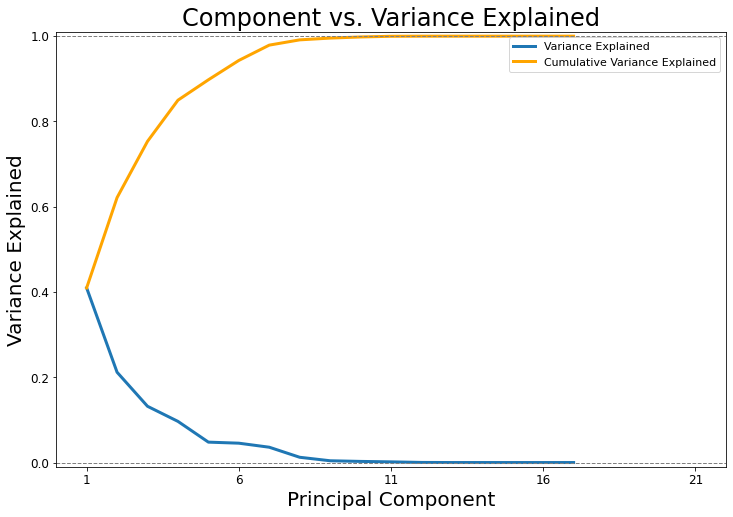

In [54]:
# Set figure size.
plt.figure(figsize=(12,8))

# Plot the explained variance.
plt.plot(range(len(var_exp)), var_exp, lw=3, label = 'Variance Explained')

# Plot the cumulative explained variance.
plt.plot(range(len(var_exp)), cum_var_exp, lw=3, color = 'orange', label = 'Cumulative Variance Explained')

# Add horizontal lines at y=0 and y=1.
plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')

# Set the limits of the axes.
plt.xlim([-1,21])
plt.ylim([-0.01,1.01])

# Label the axes.
plt.ylabel('Variance Explained', fontsize=20)
plt.xlabel('Principal Component', fontsize=20)

# Make the tick labels bigger
plt.xticks(range(0, 21, 5), range(1, 22, 5), fontsize=12)
plt.yticks(fontsize=12)
    
# Add title and legend.
plt.title('Component vs. Variance Explained', fontsize=24)
plt.legend(fontsize=11);

In [33]:
#drop
cfe['covid_recoverd'].value_counts()

0    58
Name: covid_recoverd, dtype: int64

In [37]:
X_scores = cfe[['earthquakes_score', 'fire_score', 'covid_confirmed_per_capita']]
ss_scores = StandardScaler()
X_scores_sc = ss_scores.fit_transform(X_scores)

In [36]:
for eps in linspace(.1,5,50):
    for samples in range(2,12):
        dbscan_scores = DBSCAN(eps = eps, min_samples=samples)
        dbscan_scores.fit(X_scores_sc)
        set(dbscan_scores.labels_)

{-1, 0}

In [45]:
scaled_df = pd.DataFrame(X_scores_sc, columns=['earthquakes_score', 'fire_score', 'covid_confirmed_per_capita'] )
scaled_df

,earthquakes_score,fire_score,covid_confirmed_per_capita
0,-0.414884,-0.276086,-0.310412
1,-0.414884,-1.204376,-1.171588
2,-0.414884,-0.740231,-0.761753
3,-0.414884,1.348421,-0.288004
4,-0.414884,-0.508159,-0.806826
5,-0.414884,1.116348,0.641783
6,-0.414884,0.188059,-0.138229
7,-0.414884,-1.204376,-0.886151
8,-0.414884,-0.276086,-0.856469
9,-0.178970,0.652204,0.999085


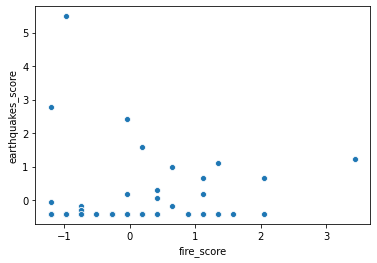

In [46]:
sns.scatterplot(scaled_df['fire_score'],scaled_df['earthquakes_score'])